# We are understanding the data by looking at the well's easting, northing, frac stages, and lengths

In [56]:

import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.linear_model import LinearRegression
import glob


Brisket 1-204H.csv is at 86600.0 eastings and 33900.0 northings.
Brisket 1-204H.csv is 4536.0 feet long.
There are 50 frac stages

Brisket 1-44H.csv is at 1900.0 eastings and 3900.0 northings.
Brisket 1-44H.csv is 8435.0 feet long.
There are 11 frac stages

Brisket 10-65H.csv is at 80100.0 eastings and 14400.0 northings.
Brisket 10-65H.csv is 6006.0 feet long.
There are 50 frac stages

Brisket 2-149H.csv is at 82600.0 eastings and 62100.0 northings.
Brisket 2-149H.csv is 6622.0 feet long.
There are 50 frac stages

Brisket 3-212H.csv is at 17700.0 eastings and 43000.0 northings.
Brisket 3-212H.csv is 8230.0 feet long.
There are 25 frac stages

Brisket 6-50H.csv is at 4200.0 eastings and 83000.0 northings.
Brisket 6-50H.csv is 5815.0 feet long.
There are 50 frac stages

Brisket 7-105H.csv is at 37100.0 eastings and 1700.0 northings.
Brisket 7-105H.csv is 8634.0 feet long.
There are 5 frac stages

Brisket 7-212H.csv is at 75500.0 eastings and 28400.0 northings.
Brisket 7-212H.csv is 6703.

Sugar 1-146H.csv is at 5600.0 eastings and 8100.0 northings.
Sugar 1-146H.csv is 8956.0 feet long.
There are 34 frac stages

Sundae 1-129H.csv is at 84100.0 eastings and 70900.0 northings.
Sundae 1-129H.csv is 9371.0 feet long.
There are 34 frac stages

Sundae 1-163H.csv is at 56200.0 eastings and 35600.0 northings.
Sundae 1-163H.csv is 5120.0 feet long.
There are 50 frac stages

Sundae 14-192H.csv is at 53800.0 eastings and 34100.0 northings.
Sundae 14-192H.csv is 5885.0 feet long.
There are 17 frac stages

Sundae 2-159H.csv is at 12700.0 eastings and 9200.0 northings.
Sundae 2-159H.csv is 6445.0 feet long.
There are 50 frac stages

Sundae 2-27H.csv is at 76000.0 eastings and 51600.0 northings.
Sundae 2-27H.csv is 6322.0 feet long.
There are 9 frac stages

Sundae 7-180H.csv is at 5500.0 eastings and 16500.0 northings.
Sundae 7-180H.csv is 9692.0 feet long.
There are 8 frac stages

Sundae 7-185H.csv is at 83100.0 eastings and 73300.0 northings.
Sundae 7-185H.csv is 8721.0 feet long.
Th

Text(0, 0.5, 'northing')

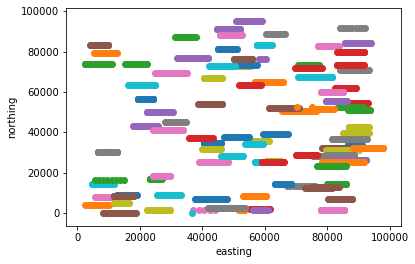

In [57]:
#go through all of the files and obtain the northing, easting, length, and number of frac stages
for elem in os.listdir("Data"):
    if elem != "well production.csv":
        df = pd.read_csv("Data/" + elem)
        print(elem + " is at " + str(df["easting"].min()) + " eastings and " + str(df["northing"].min()) + " northings." )
        print(elem + " is " + str(df["easting"].max() - df["easting"].min()) + " feet long." )
        df = df.dropna(subset=['proppant weight (lbs)'])
        #drop nan values to find the number of frac stages
        print("There are " + str(len(df["proppant weight (lbs)"])) + " frac stages")
        print()
        #plot all of the well locations
        plt.scatter(df["easting"], df["northing"])
        
plt.xlabel("easting")
plt.ylabel("northing")


# These are the calculations for original oil in place and recoverable reserves using the given data for each well

In [58]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
import os
import math

In [90]:
#I made lists of all of the data for each well respectively and plotted some of them to look at how the data correlates
lengthsOfWells = []
oilSaturationAverage = []
thickness = []
waterSaturation = []
permeability = []
porosity = []
Young = []
names = []
poisson = []
northing = []
easting = []
proppant = []

# making a list of the means of each category for each well 
for elem in os.listdir("Data"):
    if elem != "well production.csv":
        df = pd.read_csv("Data/" + elem)
        oilSaturationAverage.append(df["oil saturation"].values.mean())
        thickness.append(df["thickness (ft)"].values.mean())
        waterSaturation.append(df["water saturation"].values.mean())
        permeability.append(df["permeability"].values.mean())
        porosity.append(df["porosity"].values.mean())
        Young.append(df["Young's Modulus"].values.mean())
        lengthsOfWells.append(df.iloc[-1][0] - df.iloc[0][0])
        poisson.append(df["Poisson's ratio"].values.mean())
        northing.append(df["northing"].values.mean())
        easting.append(df["easting"].values.mean())
        df = df.dropna(subset=['proppant weight (lbs)'])
        proppant.append(df["proppant weight (lbs)"].mean())
        names.append(elem)
        
        
# making a compiled dataframe that contains the data for all 100 wells        
dfCompiled = pd.DataFrame(list(zip(names, northing, easting, lengthsOfWells, thickness, porosity, permeability,
                                   waterSaturation, Young, oilSaturationAverage, poisson, proppant)),
                          columns =["Name", "northing", "CENTER of easting", 'Length', 'Thickness', "Porosity", "Permeability",
                                    "water saturation", "Young's modulus", "oil saturation", "poisson's ratio", "proppant weight (lbs)"])


# getting data (pressure and recovery factor) from the well production.csv
dfWellProduction = pd.read_csv("Data/well production.csv")
dfWellProduction = dfWellProduction.sort_values(by=["well name"])
#resetting the indexes so our well order isn't messed up
dfWellProduction = dfWellProduction.reset_index(drop=True)

#get pressure and recovery factor
dfCompiled['average pressure (Pa)'] = dfWellProduction['average pressure (Pa)']
dfCompiled['recovery factor'] = dfWellProduction["recovery factor"]



                         
              

,Name,northing,CENTER of easting,Length,Thickness,Porosity,Permeability,water saturation,Young's modulus,oil saturation,poisson's ratio,proppant weight (lbs),average pressure (Pa),recovery factor
0,Brisket 1-204H.csv,33900.0,88867.87,4536.0,40.849003,0.0611,0.01566,0.062545,1.062235e+07,0.937455,0.30400,714701.157397,35023133,0.107214
1,Brisket 1-44H.csv,3900.0,6117.40,8435.0,5.000000,0.0567,0.01298,0.221377,4.556389e+06,0.778623,0.36054,797517.577172,36087449,0.072103
2,Brisket 10-65H.csv,14400.0,83103.15,6006.0,58.052313,0.0806,0.02811,0.065860,8.361116e+06,0.934140,0.31912,843728.433578,36199370,0.097415
3,Brisket 2-149H.csv,62100.0,85911.09,6622.0,28.468096,0.0454,0.00895,0.190072,9.908358e+06,0.809928,0.29749,862623.505923,31397763,0.085264
4,Brisket 3-212H.csv,43000.0,21815.15,8230.0,82.059431,0.0373,0.00609,0.047795,1.219924e+07,0.952205,0.32134,660351.274006,30569755,0.079498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Tribal 14-4H.csv,12900.0,79389.72,8579.0,54.119562,0.0814,0.02966,0.074205,7.178213e+06,0.925795,0.31488,692306.209005,36454201,0.102102
96,Tribal 2-17H.csv,18500.0,26993.19,5586.0,61.629917,0.0518,0.01107,0.149344,1.170635e+07,0.850656,0.33808,701518.534064,36269180,0.107993
97,Tribal 4-215H.csv,36900.0,87154.27,11309.0,41.954475,0.0639,0.01792,0.098403,1.060412e+07,0.901597,0.30187,738947.056410,34518701,0.102955
98,Tribal 6-134H.csv,5100.0,14239.81,4680.0,4.505779,0.0492,0.01048,0.215824,6.513093e+06,0.784176,0.34424,923067.690420,35955602,0.085654


,Name,northing,CENTER of easting,Length,Thickness,Porosity,Permeability,water saturation,Young's modulus,oil saturation,...,proppant weight (lbs),average pressure (Pa),recovery factor,proppant volume,E prime calculation,fracture width,fracture length,area,original oil in place,recoverable reserves
0,Brisket 1-204H.csv,33900.0,88867.87,4536.0,40.849003,0.0611,0.01566,0.062545,1.062235e+07,0.937455,...,714701.157397,35023133,0.107214,8.132377e+05,1.170399e+07,244.473997,81.433545,3.693826e+05,4.190628e+09,4.492954e+08
1,Brisket 1-44H.csv,3900.0,6117.40,8435.0,5.000000,0.0567,0.01298,0.221377,4.556389e+06,0.778623,...,797517.577172,36087449,0.072103,NaN,5.237163e+06,68.906481,NaN,NaN,NaN,NaN
2,Brisket 10-65H.csv,14400.0,83103.15,6006.0,58.052313,0.0806,0.02811,0.065860,8.361116e+06,0.934140,...,843728.433578,36199370,0.097415,NaN,9.309136e+06,451.482746,NaN,NaN,NaN,NaN
3,Brisket 2-149H.csv,62100.0,85911.09,6622.0,28.468096,0.0454,0.00895,0.190072,9.908358e+06,0.809928,...,862623.505923,31397763,0.085264,1.178374e+06,1.087039e+07,164.453064,251.699808,1.666756e+06,8.459849e+09,7.213246e+08
4,Brisket 3-212H.csv,43000.0,21815.15,8230.0,82.059431,0.0373,0.00609,0.047795,1.219924e+07,0.952205,...,660351.274006,30569755,0.079498,NaN,1.360398e+07,368.794434,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Tribal 14-4H.csv,12900.0,79389.72,8579.0,54.119562,0.0814,0.02966,0.074205,7.178213e+06,0.925795,...,692306.209005,36454201,0.102102,NaN,7.968262e+06,495.185897,NaN,NaN,NaN,NaN
96,Tribal 2-17H.csv,18500.0,26993.19,5586.0,61.629917,0.0518,0.01107,0.149344,1.170635e+07,0.850656,...,701518.534064,36269180,0.107993,1.438514e+06,1.321703e+07,338.240397,69.007640,3.854767e+05,5.075783e+09,5.481509e+08
97,Tribal 4-215H.csv,36900.0,87154.27,11309.0,41.954475,0.0639,0.01792,0.098403,1.060412e+07,0.901597,...,738947.056410,34518701,0.102955,NaN,1.166731e+07,248.251495,NaN,NaN,NaN,NaN
98,Tribal 6-134H.csv,5100.0,14239.81,4680.0,4.505779,0.0492,0.01048,0.215824,6.513093e+06,0.784176,...,923067.690420,35955602,0.085654,NaN,7.388658e+06,43.853159,NaN,NaN,NaN,NaN


In [106]:
# now doing the calculations


# calculating E' (where E is Young's modulus and v is poisson's ratio)
def E_prime(E, v):
    return E / (1 - pow(v,2))

def max_fracture_width(H, E_prime, p):
    return (2 * H * p) / (E_prime * 100)

# multiplying density of sand with proppant weight
def proppant_volume_average(p):
    return p * 0.0035318054

# get the fracture length
def fracture_length(volume, thickness, width):
    return volume / (width * thickness)

# find area by multiplying fracture length by length
def area(frac_len, length):
    return frac_len * length


# the original oil in place formula where A is area (in acres), H is thickness, por is porosity, s is water saturation, 
# and fvf is formation volume factor

def oil_in_place(A, H, por, s):
    return (7758 * A * H * por * (1 - s)) / 1.6

# calculate recoverable reserves where OOIP is the original oil in place and rf is the recovery factor
def r_r(OOIP, rf):
    return OOIP * rf
    
# make dataframe columns for each of the calculations
dfCompiled["proppant volume"] = proppant_volume_average(dfCompiled["proppant weight (lbs)"])
dfCompiled["fracture width"] = max_fracture_width(dfCompiled["Thickness"], dfCompiled["E prime calculation"], dfCompiled["average pressure (Pa)"])
dfCompiled["fracture length"] = fracture_length(dfCompiled["proppant volume"], dfCompiled['Thickness'], dfCompiled["fracture width"])
dfCompiled["area"] = area(dfCompiled["fracture length"], dfCompiled["Length"])
dfCompiled["original oil in place"] = oil_in_place(dfCompiled["area"], dfCompiled["Thickness"], 
                                                   dfCompiled["Porosity"], dfCompiled["water saturation"])
dfCompiled["recoverable reserves"] = r_r(dfCompiled["original oil in place"], dfCompiled["recovery factor"])
dfCompiled.head()



,Name,northing,CENTER of easting,Length,Thickness,Porosity,Permeability,water saturation,Young's modulus,oil saturation,...,proppant weight (lbs),average pressure (Pa),recovery factor,proppant volume,E prime calculation,fracture width,fracture length,area,original oil in place,recoverable reserves
0,Brisket 1-204H.csv,33900.0,88867.87,4536.0,40.849003,0.0611,0.01566,0.062545,1.062235e+07,0.937455,...,714701.157397,35023133,0.107214,2524.185407,1.170399e+07,2.444740,25.275928,1.146516e+05,1.300717e+09,1.394555e+08
1,Brisket 1-44H.csv,3900.0,6117.40,8435.0,5.000000,0.0567,0.01298,0.221377,4.556389e+06,0.778623,...,797517.577172,36087449,0.072103,2816.676886,5.237163e+06,0.689065,817.536125,6.895917e+06,7.380779e+09,5.321800e+08
2,Brisket 10-65H.csv,14400.0,83103.15,6006.0,58.052313,0.0806,0.02811,0.065860,8.361116e+06,0.934140,...,843728.433578,36199370,0.097415,2979.884638,9.309136e+06,4.514827,11.369432,6.828481e+04,1.447173e+09,1.409759e+08
3,Brisket 2-149H.csv,62100.0,85911.09,6622.0,28.468096,0.0454,0.00895,0.190072,9.908358e+06,0.809928,...,862623.505923,31397763,0.085264,3046.618356,1.087039e+07,1.644531,65.075522,4.309301e+05,2.187245e+09,1.864943e+08
4,Brisket 3-212H.csv,43000.0,21815.15,8230.0,82.059431,0.0373,0.00609,0.047795,1.219924e+07,0.952205,...,660351.274006,30569755,0.079498,2332.232195,1.360398e+07,3.687944,7.706531,6.342475e+04,8.963064e+08,7.125417e+07


# these are the regressions for the recoverable reserves and oil in place

In [23]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import metrics                               # measures to check our models
from sklearn.model_selection import cross_val_score       # cross validation methods
from sklearn.preprocessing import StandardScaler

In [27]:
# get the data we want to do a regression on
Name = dfCompiled['Name']
rec_fac = dfCompiled['recovery factor']
orig_oil = dfCompiled['original oil in place']
rec_rev = dfCompiled['recoverable reserves']

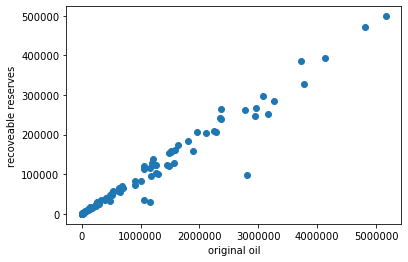

In [29]:
# graph original oil vs recoverable reserves
plt.scatter(orig_oil, rec_rev, alpha=1)
plt.xlabel('original oil')
plt.ylabel('recoveable reserves')
plt.show()

In [30]:
# get the slope, intercept, etc for the data
slope, intercept, r_value, p_value, std_err = st.linregress(orig_oil, rec_rev)

print(
    "The model parameters are, slope (b1) = "
    + str(round(slope, 2))
    + ", and the intercept (b0) = "
    + str(round(intercept, 2))
)

The model parameters are, slope (b1) = 0.09, and the intercept (b0) = -262.8


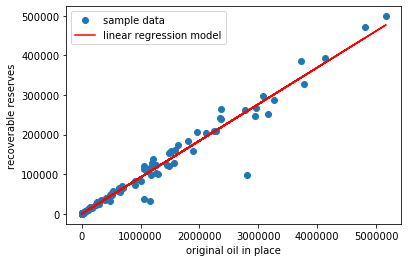

In [62]:
#plot the linear regression model

plt.plot(orig_oil, rec_rev, "o", label="sample data")
plt.plot(orig_oil, intercept + slope * orig_oil, "r", label="linear regression model")
plt.xlabel("original oil in place")
plt.ylabel("recoverable reserves")
plt.legend()
plt.show()

0.0779430305694312


Text(0, 0.5, 'recoverable reserves')

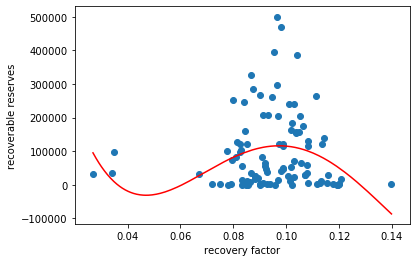

In [61]:
#make the prediction line for recovery factor vs recoverable reserves

X = rec_fac.values.reshape(-1,1)
y = rec_rev.values.reshape(-1,1)
clf = KernelRidge(alpha=0.00000000001, kernel = "rbf")
clf.fit(X, y)
print(clf.score(X, y))
xp = np.linspace(rec_fac.min(), rec_fac.max(), 501)
yp = clf.predict(xp.reshape(-1,1))
plt.plot(xp, yp, 'r')
plt.scatter(rec_fac, rec_rev)
plt.xlabel("recovery factor")
plt.ylabel("recoverable reserves")

# original basic neural network using tensor flow to model the data and predict oil saturation

In [50]:
import os
import json
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as K
from tensorflow.keras.callbacks import EarlyStopping



Using TensorFlow backend.


In [53]:

def run_model(opt, split, epochs_, first, *args):
# loads all well log data into a list
    data = []
    for i in os.listdir("Data"):
        if i != 'well production.csv':
            data.append(pd.read_csv("Data/" + i))

# combines all well log data into a dataframe
    combined = pd.concat(data)

# removes columns that might be redundant/problematic
    X = combined.drop(columns=['water saturation', 'proppant weight (lbs)', 'pump rate (cubic feet/min)']).reset_index()

# separates our dependent variable out
    y = X.pop('oil saturation')

# sets up our the neural network
    model = K.models.Sequential([K.layers.Dense(first, input_shape=[8,])])

    for i in args:
        model.add(K.layers.Dense(i))

    model.add(K.layers.Dense(1))

    #model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

    model.compile(optimizer=opt, loss='mean_squared_error')

    early_stopping = EarlyStopping(monitor='val_loss', min_delta=100, patience=10, 
            restore_best_weights=True)

# fits model to data
    history = model.fit(X, y, epochs=epochs_, validation_split=split, callbacks=[early_stopping])

    return model.to_json()

optimizer = K.optimizers.Adam(lr=0.005, beta_1=0.9, beta_2=.999, amsgrad=False)

models = []
for i in range(10):
    info = run_model(optimizer, .5, 50, 10, 10, 10)
    models.append(info)

with open('models.txt', 'w') as f:
    f.write(json.dumps(models))

Train on 5000 samples, validate on 5000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
5000/5000 [==============================] - 1s 256us/sample - loss: 321957670951.2192 - val_loss: 180367761.2544
Epoch 2/50
5000/5000 [==============================] - 0s 99us/sample - loss: 169628194.2016 - val_loss: 166669482.9696
Epoch 3/50
5000/5000 [==============================] - 0s 98us/sample - loss: 152618065.6128 - val_loss: 142670909.2224
Epoch 4/50
5000/5000 [==============================] - 0s 98us/sample - loss: 134867991.3728 - val_loss: 161530153.0752
Epoch 5/50
5000/5000 [==============================] - 0s 100us/sample - loss: 113736423.7056 - val_loss: 105627823.7696
Epoch 6/50
5000/5000 [==============================] - 1s 102us/sample - loss: 91173471.8976 - val_loss: 85494178.3808
Epoch 7/50
5000/5000 [==============================] - 1s 101us/sample - loss: 76145371.1040 - val_loss: 66770579.2000
Epoch 8/50
5000/5000 [==============================] 

5000/5000 [==============================] - 1s 102us/sample - loss: 1819.2027 - val_loss: 1263.5081
Epoch 30/50
5000/5000 [==============================] - 1s 102us/sample - loss: 1204.5377 - val_loss: 879.6087
Epoch 31/50
5000/5000 [==============================] - 1s 101us/sample - loss: 783.5923 - val_loss: 581.6322
Epoch 32/50
5000/5000 [==============================] - 1s 102us/sample - loss: 496.1688 - val_loss: 344.4613
Epoch 33/50
5000/5000 [==============================] - 1s 109us/sample - loss: 317.9177 - val_loss: 238.2236
Epoch 34/50
5000/5000 [==============================] - 1s 103us/sample - loss: 192.2980 - val_loss: 161.6584
Epoch 35/50
5000/5000 [==============================] - 1s 100us/sample - loss: 124.3356 - val_loss: 109.8083
Epoch 36/50
5000/5000 [==============================] - 0s 98us/sample - loss: 79.9948 - val_loss: 58.5557
Epoch 37/50
5000/5000 [==============================] - 1s 101us/sample - loss: 56.1657 - val_loss: 45.1152
Epoch 38/50
500

5000/5000 [==============================] - 0s 100us/sample - loss: 19648199.5904 - val_loss: 18542905.5808
Epoch 4/50
5000/5000 [==============================] - 1s 101us/sample - loss: 16710694.9952 - val_loss: 14796937.1968
Epoch 5/50
5000/5000 [==============================] - 1s 111us/sample - loss: 13949127.9488 - val_loss: 11754461.1840
Epoch 6/50
5000/5000 [==============================] - 1s 109us/sample - loss: 11564038.5152 - val_loss: 10431546.8856
Epoch 7/50
5000/5000 [==============================] - 1s 101us/sample - loss: 9523501.0688 - val_loss: 7989200.2416
Epoch 8/50
5000/5000 [==============================] - 1s 108us/sample - loss: 7737483.8248 - val_loss: 6028117.4368
Epoch 9/50
5000/5000 [==============================] - 1s 108us/sample - loss: 6025207.4520 - val_loss: 5381560.6720
Epoch 10/50
5000/5000 [==============================] - 1s 108us/sample - loss: 4660574.8972 - val_loss: 4016722.0052
Epoch 11/50
5000/5000 [==============================] - 0

Epoch 34/50
5000/5000 [==============================] - 1s 101us/sample - loss: 49945.6319 - val_loss: 45134.4090
Epoch 35/50
5000/5000 [==============================] - 1s 111us/sample - loss: 40642.8882 - val_loss: 38137.5184
Epoch 36/50
5000/5000 [==============================] - 1s 109us/sample - loss: 31437.2338 - val_loss: 28946.3738
Epoch 37/50
5000/5000 [==============================] - 1s 120us/sample - loss: 25233.3207 - val_loss: 23110.0416
Epoch 38/50
5000/5000 [==============================] - 1s 115us/sample - loss: 19903.0440 - val_loss: 21345.2059
Epoch 39/50
5000/5000 [==============================] - 1s 105us/sample - loss: 15235.4013 - val_loss: 13765.1215
Epoch 40/50
5000/5000 [==============================] - 0s 71us/sample - loss: 11875.9627 - val_loss: 10129.0659
Epoch 41/50
5000/5000 [==============================] - 1s 106us/sample - loss: 9021.3365 - val_loss: 8721.8109
Epoch 42/50
5000/5000 [==============================] - 0s 89us/sample - loss: 667

5000/5000 [==============================] - 0s 99us/sample - loss: 14501593.3632 - val_loss: 14056232.0896
Epoch 10/50
5000/5000 [==============================] - 1s 124us/sample - loss: 13398123.5672 - val_loss: 13304532.2272
Epoch 11/50
5000/5000 [==============================] - 1s 119us/sample - loss: 12518004.7768 - val_loss: 12585287.2240
Epoch 12/50
5000/5000 [==============================] - 1s 114us/sample - loss: 11652572.1520 - val_loss: 12524658.6496
Epoch 13/50
5000/5000 [==============================] - 1s 107us/sample - loss: 10804745.5456 - val_loss: 10367894.8448
Epoch 14/50
5000/5000 [==============================] - 1s 117us/sample - loss: 9813016.1984 - val_loss: 9044710.3344
Epoch 15/50
5000/5000 [==============================] - 1s 118us/sample - loss: 8872083.8416 - val_loss: 8168178.8080
Epoch 16/50
5000/5000 [==============================] - 1s 113us/sample - loss: 8097651.3216 - val_loss: 7545459.1020
Epoch 17/50
5000/5000 [============================

5000/5000 [==============================] - 1s 117us/sample - loss: 18169.7310 - val_loss: 14921.5053
Epoch 30/50
5000/5000 [==============================] - 0s 99us/sample - loss: 12411.3108 - val_loss: 10804.1274
Epoch 31/50
5000/5000 [==============================] - 1s 112us/sample - loss: 9049.7332 - val_loss: 7943.4607
Epoch 32/50
5000/5000 [==============================] - 1s 117us/sample - loss: 6737.0977 - val_loss: 5356.7591
Epoch 33/50
5000/5000 [==============================] - 1s 116us/sample - loss: 4670.3215 - val_loss: 3930.1247
Epoch 34/50
5000/5000 [==============================] - 1s 107us/sample - loss: 2833.4205 - val_loss: 2273.4268
Epoch 35/50
5000/5000 [==============================] - 1s 104us/sample - loss: 1997.4368 - val_loss: 1670.7701
Epoch 36/50
5000/5000 [==============================] - 0s 94us/sample - loss: 1101.3000 - val_loss: 1000.5574
Epoch 37/50
5000/5000 [==============================] - 0s 62us/sample - loss: 663.0580 - val_loss: 615.3

Epoch 1/50
5000/5000 [==============================] - 2s 422us/sample - loss: 667619169798.6400 - val_loss: 9380150.0352
Epoch 2/50
5000/5000 [==============================] - 0s 97us/sample - loss: 9097760.5200 - val_loss: 9683763.7776
Epoch 3/50
5000/5000 [==============================] - 1s 103us/sample - loss: 8753592.8576 - val_loss: 9236024.3328
Epoch 4/50
5000/5000 [==============================] - 1s 100us/sample - loss: 8338658.3024 - val_loss: 8955616.5424
Epoch 5/50
5000/5000 [==============================] - 1s 105us/sample - loss: 8000163.3344 - val_loss: 8878665.4016
Epoch 6/50
5000/5000 [==============================] - 0s 98us/sample - loss: 7631240.5424 - val_loss: 7735966.6744
Epoch 7/50
5000/5000 [==============================] - 1s 115us/sample - loss: 7230917.9368 - val_loss: 8197137.4624
Epoch 8/50
5000/5000 [==============================] - 1s 111us/sample - loss: 6854427.2064 - val_loss: 6793030.7728
Epoch 9/50
5000/5000 [==============================]

# this is another attempt at a neural network

In [65]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import random
import tensorflow.keras as K
from tensorflow.keras.callbacks import EarlyStopping
import os

prod = pd.read_csv('Data\well production.csv')

In [67]:
oil = prod.filter(regex="oil.*")
total_oil = oil.sum(axis=1)
prod['total oil'] = total_oil
prod

,well name,average pressure (Pa),recovery factor,formation volume factor,oil 1,oil 2,oil 3,oil 4,oil 5,oil 6,...,water 4,water 5,water 6,water 7,water 8,water 9,water 10,water 11,water 12,total oil
0,Peak 6-217H,35352874,0.092554,1.6,862.0,824.0,759.0,728.0,661.0,601.0,...,211.0,277.0,338.0,397.0,445.0,547.0,562.0,639.0,668.0,6808.0
1,Tarragon 4-119H,34882173,0.107706,1.6,228.0,249.0,214.0,210.0,161.0,163.0,...,27.0,75.0,74.0,59.0,90.0,124.0,119.0,126.0,157.0,1968.0
2,Fennel 10-129H,36064538,0.079150,1.6,67.0,85.0,73.0,73.0,57.0,58.0,...,15.0,31.0,30.0,33.0,31.0,20.0,49.0,30.0,41.0,736.0
3,Federal 14-113H,35817881,0.103748,1.6,256.0,242.0,267.0,263.0,199.0,191.0,...,13.0,78.0,86.0,119.0,134.0,139.0,162.0,136.0,183.0,2204.0
4,King 7-184H,38442406,0.084675,1.6,23.0,29.0,31.0,50.0,72.0,52.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,490.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Pole 11-4H,38969367,0.095266,1.6,981.0,921.0,873.0,821.0,737.0,673.0,...,403.0,487.0,551.0,618.0,694.0,761.0,811.0,906.0,955.0,7605.0
96,Burger 6-148H,31737857,0.119667,1.6,5.0,47.0,12.0,6.0,54.0,1.0,...,0.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,315.0
97,King 14-184H,38890043,0.094694,1.6,1053.0,997.0,954.0,875.0,794.0,737.0,...,439.0,520.0,577.0,650.0,724.0,792.0,897.0,934.0,1017.0,8279.0
98,Tribal 14-4H,36454201,0.102102,1.6,332.0,343.0,305.0,273.0,266.0,275.0,...,86.0,93.0,84.0,135.0,169.0,162.0,211.0,216.0,275.0,2780.0


In [68]:

min_eastings = np.zeros(oil.shape[0])
max_eastings = np.zeros(oil.shape[0])
northings = np.zeros(oil.shape[0])

well_names = list(prod['well name'])
for _, row in prod.iterrows():
    idx = well_names.index(row['well name'])
    temp = pd.read_csv('data/' + row['well name'] + '.csv')

    min_eastings[idx] = temp['easting'].min()
    max_eastings[idx] = temp['easting'].max()
    northings[idx] = temp['northing'][0]

prod['min eastings'] = pd.Series(min_eastings)
prod['max eastings'] = pd.Series(max_eastings)
prod['northings'] = pd.Series(northings)
print(prod)

          well name  average pressure (Pa)  recovery factor  \
0       Peak 6-217H               35352874         0.092554   
1   Tarragon 4-119H               34882173         0.107706   
2    Fennel 10-129H               36064538         0.079150   
3   Federal 14-113H               35817881         0.103748   
4       King 7-184H               38442406         0.084675   
..              ...                    ...              ...   
95       Pole 11-4H               38969367         0.095266   
96    Burger 6-148H               31737857         0.119667   
97     King 14-184H               38890043         0.094694   
98     Tribal 14-4H               36454201         0.102102   
99  Pikachu 13-133H               37014581         0.114249   

    formation volume factor   oil 1  oil 2  oil 3  oil 4  oil 5  oil 6  ...  \
0                       1.6   862.0  824.0  759.0  728.0  661.0  601.0  ...   
1                       1.6   228.0  249.0  214.0  210.0  161.0  163.0  ...   
2     

[78000.   78378.25 78756.5  ... 67800.75 68065.5  68330.25]


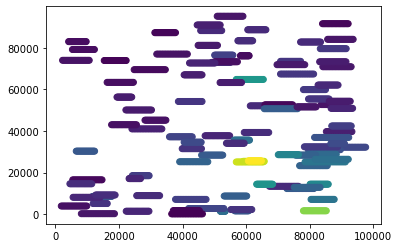

In [69]:
def plot_range(x_min, x_max, y_min, y_max, res):
    slope = (y_max - y_min)/(x_max - x_min)
    interval = (x_max - x_min)/res
    x = [x_min + interval*i for i in range(res)]
    y = [y_min + slope*(x_min + interval*i) for i in range(res)]
    
    return np.array(x).flatten('F'), np.array(y).flatten('F')

x, y = plot_range(prod['min eastings'], prod['max eastings'], prod['northings'], prod['northings'], 20)
print(x)
color = []
for i in prod['total oil']:
    color.append(20*[i])
plt.scatter(x, y, c=np.repeat(prod['total oil'], 20))
#plt.scatter(x, y)


# this one predicts total oil production from 9 features

Train on 5000 samples, validate on 5000 samples
Epoch 1/100
5000/5000 [==============================] - 2s 477us/sample - loss: 0.0447 - val_loss: 0.0316
Epoch 2/100
5000/5000 [==============================] - 1s 116us/sample - loss: 0.0174 - val_loss: 0.0304
Epoch 3/100
5000/5000 [==============================] - 1s 131us/sample - loss: 0.0155 - val_loss: 0.0288
Epoch 4/100
5000/5000 [==============================] - 1s 117us/sample - loss: 0.0152 - val_loss: 0.0270
Epoch 5/100
5000/5000 [==============================] - 1s 129us/sample - loss: 0.0158 - val_loss: 0.0273
Epoch 6/100
5000/5000 [==============================] - 1s 122us/sample - loss: 0.0153 - val_loss: 0.0282
Epoch 7/100
5000/5000 [==============================] - 1s 130us/sample - loss: 0.0153 - val_loss: 0.0271
Epoch 8/100
5000/5000 [==============================] - 1s 133us/sample - loss: 0.0153 - val_loss: 0.0282
Epoch 9/100
5000/5000 [==============================] - 1s 125us/sample - loss: 0.0153 - val_lo

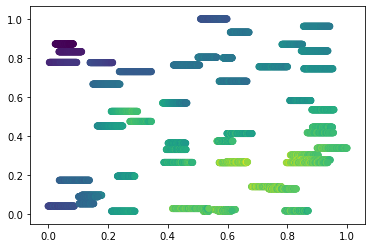

Train on 5500 samples, validate on 4500 samples
Epoch 1/100
5500/5500 [==============================] - 2s 421us/sample - loss: 0.0131 - val_loss: 0.0140
Epoch 2/100
5500/5500 [==============================] - 1s 116us/sample - loss: 0.0109 - val_loss: 0.0120
Epoch 3/100
5500/5500 [==============================] - 1s 121us/sample - loss: 0.0105 - val_loss: 0.0112
Epoch 4/100
5500/5500 [==============================] - 1s 128us/sample - loss: 0.0107 - val_loss: 0.0132
Epoch 5/100
5500/5500 [==============================] - 1s 120us/sample - loss: 0.0107 - val_loss: 0.0119
Epoch 6/100
5500/5500 [==============================] - 1s 126us/sample - loss: 0.0104 - val_loss: 0.0130
Epoch 7/100
5500/5500 [==============================] - 1s 121us/sample - loss: 0.0105 - val_loss: 0.0118
Epoch 8/100
5500/5500 [==============================] - 1s 115us/sample - loss: 0.0104 - val_loss: 0.0117
Epoch 9/100
5500/5500 [==============================] - 1s 118us/sample - loss: 0.0105 - val_lo

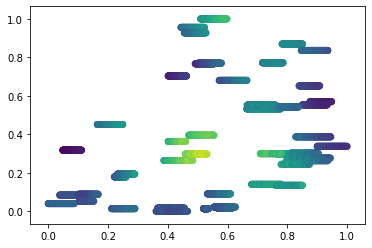

Train on 5000 samples, validate on 5000 samples
Epoch 1/100
5000/5000 [==============================] - 2s 454us/sample - loss: 0.0579 - val_loss: 0.0449
Epoch 2/100
5000/5000 [==============================] - 0s 91us/sample - loss: 0.0375 - val_loss: 0.0452
Epoch 3/100
5000/5000 [==============================] - 0s 85us/sample - loss: 0.0374 - val_loss: 0.0506
Epoch 4/100
5000/5000 [==============================] - 1s 104us/sample - loss: 0.0377 - val_loss: 0.0501
Epoch 5/100
5000/5000 [==============================] - 0s 91us/sample - loss: 0.0374 - val_loss: 0.0443
Epoch 6/100
5000/5000 [==============================] - 0s 74us/sample - loss: 0.0376 - val_loss: 0.0487
Epoch 7/100
5000/5000 [==============================] - 1s 152us/sample - loss: 0.0376 - val_loss: 0.0473
Epoch 8/100
5000/5000 [==============================] - 1s 123us/sample - loss: 0.0374 - val_loss: 0.0461
Epoch 9/100
5000/5000 [==============================] - 0s 77us/sample - loss: 0.0373 - val_loss: 0

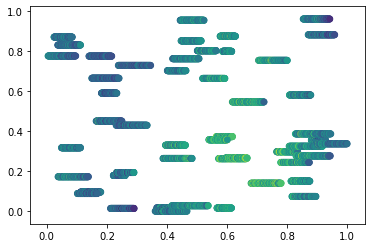

    easting  northing  porosity
0   86600.0   33900.0      0.07
1   86646.0   33900.0      0.07
2   86692.0   33900.0      0.07
3   86737.0   33900.0      0.07
4   86783.0   33900.0      0.06
..      ...       ...       ...
95  50283.0   72700.0      0.05
96  50368.0   72700.0      0.04
97  50453.0   72700.0      0.04
98  50538.0   72700.0      0.04
99  50623.0   72700.0      0.04

[4500 rows x 3 columns]
Train on 4500 samples, validate on 5500 samples
Epoch 1/100
4500/4500 [==============================] - 3s 593us/sample - loss: 0.0265 - val_loss: 0.0211
Epoch 2/100
4500/4500 [==============================] - 1s 118us/sample - loss: 0.0173 - val_loss: 0.0195
Epoch 3/100
4500/4500 [==============================] - 1s 124us/sample - loss: 0.0173 - val_loss: 0.0198
Epoch 4/100
4500/4500 [==============================] - 1s 118us/sample - loss: 0.0172 - val_loss: 0.0192
Epoch 5/100
4500/4500 [==============================] - 1s 134us/sample - loss: 0.0172 - val_loss: 0.0216
Epoch 6/

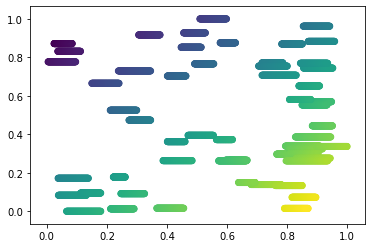